In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#reading the dataset
df = pd.read_csv('data/height-weight.csv')


In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


Text(0, 0.5, 'Height')

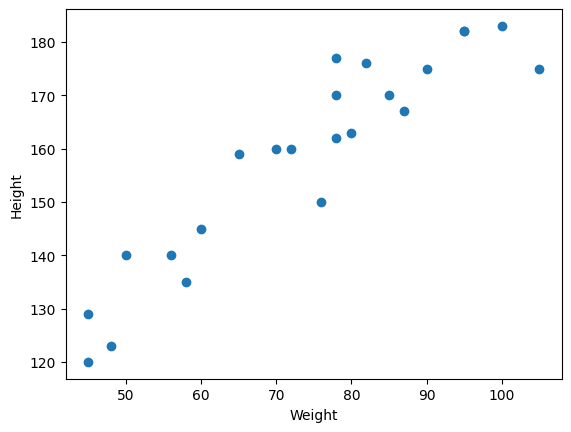

In [8]:
#scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [9]:
#checking out correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


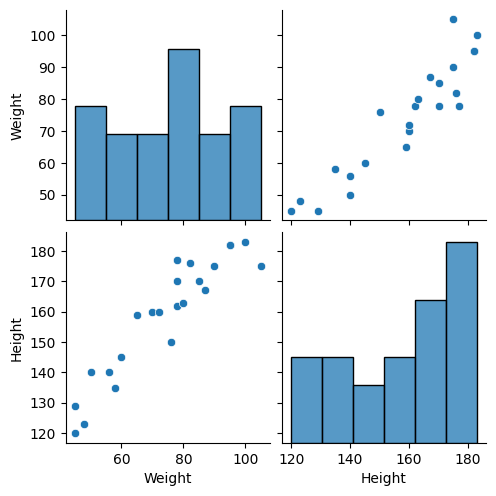

In [10]:
#seaborn for visualization for correlation by using pairplot
sns.pairplot(df)

## 1. divide the feature into independent and dependent
## 2. train test split
## 3. standarization -z score, mean = 0 and standard deviation =1, Xi- miu/ standard deviation

In [11]:

#independent and dependent feature
X= df[['Weight']] #independent feature should be data frame or 2 dimention array
y= df['Height'] #this variable can be array or 1d array

In [12]:
X_series= df['Weight']
np.array(X_series).shape

(23,)

In [13]:
np.array(y).shape

(23,)

In [14]:
np.array(X).shape

(23, 1)

In [15]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [17]:
#Standardization- to make feature in the same unit
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
#in training we use fit_transform and in the test we use transform because we will use the same mean and standard deviation formula for the test data
X_train= scaler.fit_transform(X_train)

In [19]:
#in test data we do not apply fit_transform, we only use transform, because of the DATA LEAKAGE WE DO THAT, TO PREVENT DATA LEAKAGE, WE DO NOT WANT TEST DATA TO KNOW ANY INFO ABOUT TRAINING DATA
X_test = scaler.transform(X_test)

In [20]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [21]:
#apply linear regression
from sklearn.linear_model import LinearRegression
linearreg= LinearRegression(n_jobs= -1)

In [22]:
linearreg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [23]:
linearreg

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [24]:
#coefficient
print(F"Coefficient or slope: {linearreg.coef_}")
#one unit movement change in the x axis, how much change happend in the y axis

Coefficient or slope: [17.2982057]


In [25]:
#intercept
print(f"Intercept: {linearreg.intercept_}")

Intercept: 156.47058823529412


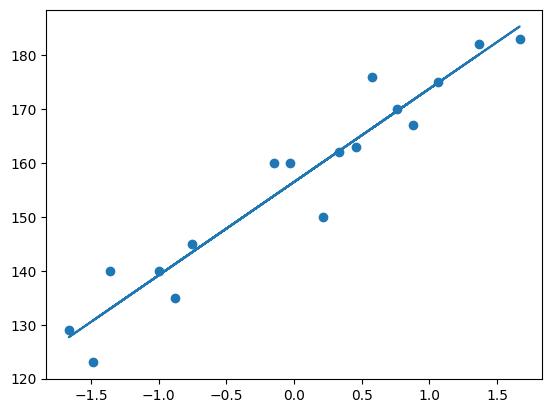

In [26]:
#plot the best fit line for the training data
plt.scatter(X_train, y_train)
plt.plot(X_train, linearreg.predict(X_train))


In [27]:
#prediction for the test data
y_pred= linearreg.predict(X_test)

In [28]:
#Performance Matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mse= mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 114.84069295228699
Mean Absolute Error: 9.66512588679501
Root Mean Squared Error: 10.716374991212605


 ### R square 
 formula= R^2= 1- SSResiduals/SSTotal
 R^2= coefficient of determination SSR = sum of squares of residuals SST = total sum of square


In [29]:
r2= r2_score(y_test, y_pred)

In [30]:
print(f"Model accuracy: {r2}")

Model accuracy: 0.7360826717981276


### Adjusted R square
 - adjusted r2= 1-[((1-R2)*(n-1))/(n-k-1)]
 - R2= The r2 od the model
 - n= the number of observations
 - k= the number of predictor variables



In [31]:
#display adjusted R-squared
adjusted_r2= 1- ((1-r2)* (len(y_test)-1))/ (len(y_test)-X_test.shape[1]-1)
print(f"Adjusted r2: {adjusted_r2}")

Adjusted r2: 0.6701033397476595


### OLS LINEAR REGRESSION


In [32]:
import statsmodels.api as sm


In [33]:
model = sm.OLS(y_train, X_train).fit()

In [34]:
predictions = model.predict(X_test)

In [36]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 26 Jan 2026   Prob (F-statistic):                       0.664
Time:                        02:00:46   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [39]:
#prediction for new data
linearreg.predict(scaler.transform([[72]]))

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])